# ELEC 400M / EECE 571M Assignment 3: Clustering
(Again, this assignment drew inspiration from an assignment used in ECE 421 at the University of Toronto and kindly made available to us by the instructor; as well as from the problem set in our textbook Learning from Data.)

In this assignment, you will implement and test methods for clustering that we have discussed in the course.

## Data Sets

You will be working with two data sets:
- data2D.npy
- data100D.npy

Each of the data sets has 10,000 data points, which are 2-dimensional and 100-dimensional, respectively.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## K-Means algorithm [18 marks]

You will first implement and test the K-means algorithm. 

### Implement the functions [5 marks]

For this, you will only use functions from the NumPy library. You will implement four functions to realize the K-Means algorithm.

- `distanceFunc`: This function accepts your data and cluster centers and returns the squared pairwise distances between data points and cluster centers. 
- `KMinit`: This function accepts your data and returns the initial cluster centres. You will use the "greedy approach" described on page 6-16 in the textbook, but instead of a randomly selected data point always pick the first entry in the data set as the first center. 
- `lossFunc`: This function accepts the squared pairwise distances between data points and cluster centers and returns the sum of cluster errors as defined in (6.5) in the textbook. 
- `KMmeans`: This function implements the K-Means algorithm as described in the textbook. It returns the cluster centers and the sum of cluster errors as defined in (6.5) in the textbook. 

In [1]:
def distanceFunc(x, mu):
    # Inputs  
    # x: is an NxD data matrix (N observations and D dimensions)
    # mu: is an KxD cluster center matrix (K cluster centers and D dimensions)
    # Output
    # pair_dist2: is the NxK matrix of squared pairwise distances
    
    x1 = np.expand_dims(x,0)
    mu1 = np.expand_dims(mu, 1)
    dis = np.sum(np.square(np.subtract(x1,mu1)),axis=2)
    output = dis.T
    return output

In [139]:
def KMinit(x, K):
    # Inputs
    # x: is an NxD data matrix 
    # K: number of clusters
    # Output
    # mu: is the KxD matrix of initial cluster centers using the "greedy approach" described on page 6-16 in the textbook. 
    # Remark: Always pick the first entry in the data set as the first center. 
    
    K = K+1
    #first point
    centroid = [0] * (K-1)
    centroid[0]=x[0]
    d_far =[]
    
    # centroid1 = np.array(centroid)
    for i in range(1,K):
        farlist = []
        dislist = []
        idxlist = []
        lastidxlist = []
        #print('******i*****',i,'\n')
        for j in range(i):
            if(j==0):
                cent = x[0]
            else:
                p = 0
                #print('j',j)
                d_far = np.sum(np.square((x - centroid[j-1])), axis=1)
                far =  x[np.argmax(d_far, axis=0)];
                index = np.argpartition(d_far,len(x)-1)
                lastidx = index[-1+p]
                while(lastidx in lastidxlist):
                    p = p-1
                    lastidx = index[-1+p]
                farlist.append(far)
                dislist.append(d_far)
                idxlist.append(index)
                lastidxlist.append(lastidx)
                cent=x[lastidx]
        centroid[j]=cent
      
    return centroid

In [3]:
def lossFunc(pair_dist2):
    # Input 
    # pair_dist2: is an NxK matrix of squared pairwise distances
    # Output
    # loss: error as defined in (6.5) in the textbook
    
    t = np.max(-1*pair_dist2, axis=1)
    t = -1*t
    loss = np.sum(t, axis=0)
    return loss

In [132]:
def Kmeans(x,K):
    # Inputs
    # x: is an NxD data matrix 
    # K: number of clusters
    # Outputs
    # mu: is the KxD of cluster centers  
    # loss: error as defined in (6.5) in the textbook 
    
    maxIters = 500
    Loss_curve = []
    c = KMinit(x,K) #Init the cluster center
    d = np.stack(c[:])
    distance = distanceFunc(x, d)
    l = lossFunc(distance)
    Loss_curve.append(l)
    for i in range(maxIters):  
        # Cluster update 
        #print('Iteration:',i)
        Cluster = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in d]) for x_i in x])
        # Centroids update
        new_mu = [x[Cluster == k].mean(axis = 0) for k in range(K)]
        d = np.stack(new_mu[:])        
        #DistanceCalc
        distance = distanceFunc(x, d)
        #LossCalc
        prel = l;
        l = lossFunc(distance)
        Loss_curve.append(l)
        if(l == prel):  #Continue until the error converges
            break

    return np.array(new_mu) , Cluster, Loss_curve, l
    

### Test the functions [5 marks]

Develop toy-sized test cases (create your own very small data set(s)) for all four functions and verify the correct operation. 

Use the code cell below to program the test cases and to print and/or plot the results as appropriate. 

Use the text cell below to describe your test cases and comment on the results.

Shape of dataset: (6, 2)
Shape of centroids: (1, 2) 

*****Distance test*****
Shape of pairwise distance matrix: (6, 1)
Squared pairwise distances =  [[ 6.25]
 [ 4.  ]
 [ 6.25]
 [ 9.  ]
 [10.25]
 [ 8.  ]] 

*****KMint test*****
Centroid when K = 1: [array([0., 0.])]
Centroid when K = 2: [array([0., 0.]), array([5.5, 0. ])]
Centroid when K = 3: [array([0., 0.]), array([5.5, 0. ]), array([0., 2.])] 

*****lossFunc test*****
Loss =  43.75 

*****KMeans test***** 

Number of clusters = 2
New centroids =  [[0.25 1.  ]
 [5.25 0.  ]]
*****KMeans test***** 

Number of clusters = 3
New centroids =  [[0.25 0.  ]
 [5.25 0.  ]
 [0.25 2.  ]]


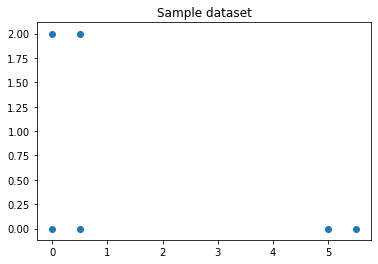

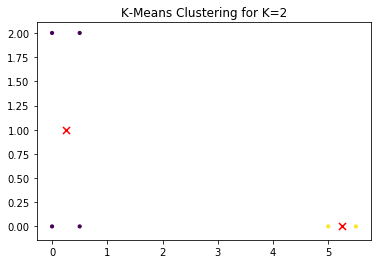

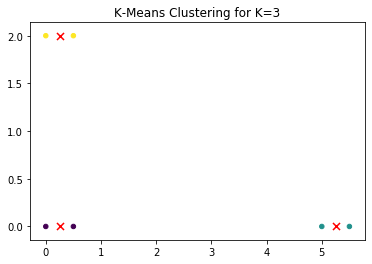

In [142]:
#Creating a sample dataset
sample = [[0,0], [0.5,0], [5,0], [5.5,0], [0,2],[0.5,2]]
sample = np.array(sample)
print('Shape of dataset:',np.shape(sample))
plt.scatter(sample[:,0],sample[:,1])
plt.title('Sample dataset')

#distanceFunc TEST
m1 = [[2.5,0]] #Assuming only one centroid m1 for this testcase
m1 = np.array(m1)
print('Shape of centroids:',np.shape(m1),'\n')
print('*****Distance test*****')
dist = distanceFunc(sample,m1) #Calculate the squared pairwise distances
print('Shape of pairwise distance matrix:',np.shape(dist))
print('Squared pairwise distances = ',dist,'\n')

#KMinit TEST
print('*****KMint test*****')
#Number of Clusters =  1
c1 = KMinit(sample,1)
print('Centroid when K = 1:',c1)
#Number of Clusters =  2
c2 = KMinit(sample,2)
print('Centroid when K = 2:',c2)
#Number of Clusters =  3
c3 = KMinit(sample,3)
print('Centroid when K = 3:',c3,'\n')

#lossFunc TEST
print('*****lossFunc test*****')
l = lossFunc(dist)
print('Loss = ',l,'\n')

#KMeans TEST
print('*****KMeans test*****','\n')
print('Number of clusters = 2')
k = 2
m3 , Cluster3, l3, L = Kmeans(sample,k)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sample[:,0],sample[:,1],c=Cluster3,s=10,marker='o')
scatter = ax.scatter(m3[:,0],m3[:,1],c='red',s=50,marker='x')
ax.set_title('K-Means Clustering for K=%i'%k)
print('New centroids = ',m3)


print('*****KMeans test*****','\n')
print('Number of clusters = 3')
k = 3
m3 , Cluster3, l3, L = Kmeans(sample,k)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sample[:,0],sample[:,1],c=Cluster3,s=20,marker='o')
scatter = ax.scatter(m3[:,0],m3[:,1],c='red',s=50,marker='x')
ax.set_title('K-Means Clustering for K=%i'%k)
print('New centroids = ',m3)


### Explanation:
Dataset: The choosen sample dataset contains 6 points which resembels a triangle as shown in the first figure.
1. **distanceFunc**: Shape of dataset is (6, 2) and the shape of sample centroid is (1, 2), the output of the function should have a shape (6,1). The result shows the pairwise squared distance of each point in the dataset to the centroid.

For this testcase (2.5,0) was choosen as the mean. The squared distance between the first point(0,0) is 0^2 + 2.5^2 = **6.25**. This matches with the result of the test as shown above. 

2. **KMinit**: This function chooses K initial centroid points in the dataset. The first centroid is always the first point in the dataset, the next cluster center is the point furtherest from the current center. This is repeated until K cluster centers are found. 
  
From the result we can see that the first centroid is always (0,0), the next centroid is the furthest point which is (5.5,0) and the algorithm is continued until K centers are reached.
The test is done for K=2,3 clusters and their corresponding centroids as the result.

3. **lossFunc**: The K-means loss is the sum of squared pairwise distances between data points and cluster centers. The loss is the sum of cluster errors $E_j$.
$$E_{in}\ =\ \sum_{j\ =\ 1}^{k}E_j$$ where
$$E_j\ =\ \sum_{x_n\varepsilon\ S_j}{||x_n\ -\ \mu_n||}^2$$
 
The functions takes the matrix of squared pairwise distances as the input and returns the calculated loss. The test shows the result of loss when k = 1. The list of squared distance was previously calculated as dist in distanceFunc. Thus, the loss function should have a result which is the sum of all the values in dist. Hence *6.25 + 4 + 6.25 + 9 + 10.25 + 8 =* **43.75**, which matches the test as shown above.


4. **Kmeans**: This function implements the K-Means algorithm and returns the cluster centers and the sum of cluster errors and the final loss value. The testcase runs Kmeans algorithm for k = 2. Hence there should be 2 clusters with 2 cluster centers. The 'x' denotes the cluster centers and 'o' with different coulors denote the different centers.
   
The result shows the clustering of the data set into 2 clusters along with their centers such that that the loss is minimized.
   

### Run K-Means on 2D data set [4]

Implement a script that runs the K-Means algorithm (using the functions above) with $K = 1, 2, 3, 4, 5$ for the data set data2D.npy.  

The script should produce the following plots:
- for each of these values of $K$, a 2D scatter plot of the data points colored by their cluster assignments plus the cluster centers
- the K-means loss as a function of $K$

Number of Clusters (k): 1 

---------------------------------------------- 

Number of Clusters (k): 2 

---------------------------------------------- 

Number of Clusters (k): 3 

---------------------------------------------- 

Number of Clusters (k): 4 

---------------------------------------------- 

Number of Clusters (k): 5 

---------------------------------------------- 



(0.8, 6)

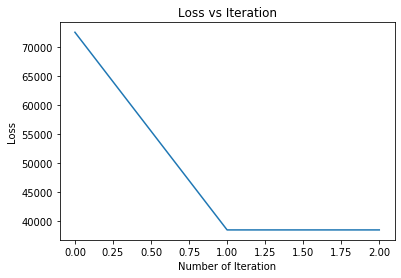

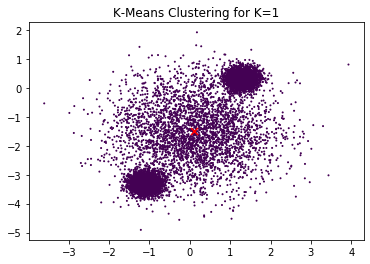

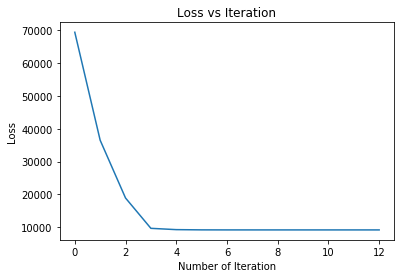

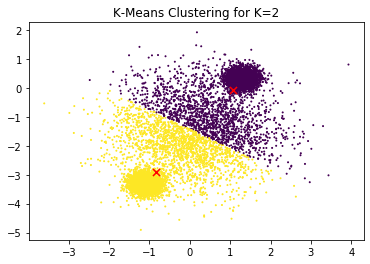

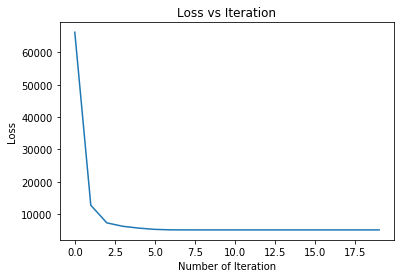

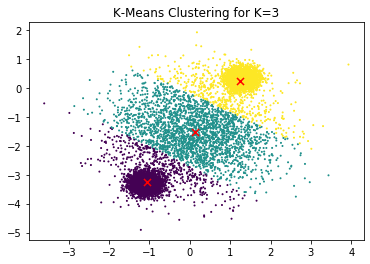

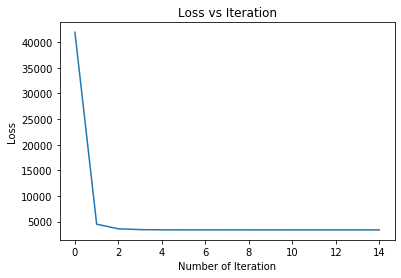

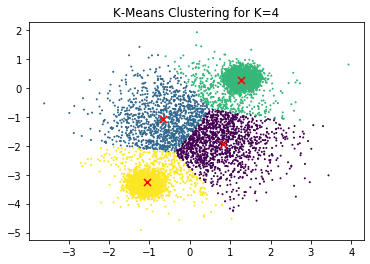

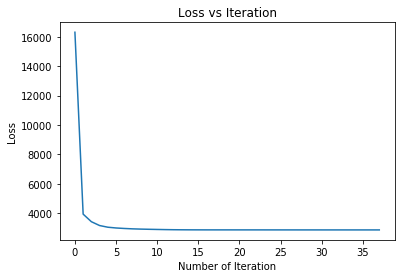

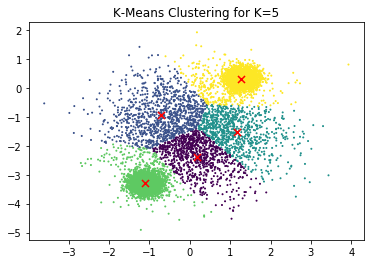

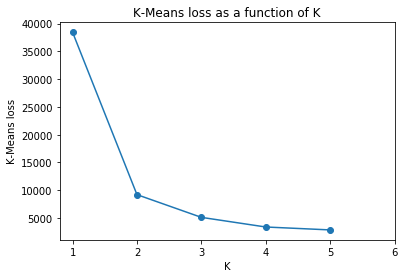

In [143]:
#Script to run Kmeans for k = 1,2,3,4,5
data = np.load('C:/Users/Jarvis\Documents/Academic/Fall/Term2/Machine Learning/_Assignment3/data2D.npy') #Load the data
[num_pts,dim] = np.shape(data)
lossK = [] #Init a list to hold the loss values
lossK.append(None)

#LOOP
for clusterNo in range(1,6):
    print('Number of Clusters (k):', clusterNo,'\n')
    
    c = KMinit(data,clusterNo)     #initialise cluster centers
    d = np.stack(c[:])
    
    mid,clusters,Losscurve,L = Kmeans(data, clusterNo)  #Run KMeans algorithm 
    
    plt.figure()    
    plt.plot(Losscurve)  
    plt.title('Loss vs Iteration')
    plt.xlabel('Number of Iteration')
    plt.ylabel('Loss')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(data[:,0],data[:,1],c=clusters,s=1)
    scatter = ax.scatter(mid[:,0],mid[:,1],c='r',s=50,marker='x')
    ax.set_title('K-Means Clustering for K=%i'%clusterNo)       
    lossK.append(L) #hold the values to plot
    print('----------------------------------------------','\n')
plt.figure()    
plt.plot(lossK,marker='o')
plt.title('K-Means loss as a function of K')
plt.xlabel('K')
plt.ylabel('K-Means loss')
plt.xlim([0.8,6])

Discuss below on how many clusters you think is "best" and why? 

### Answer:
From the plot between K vs Kmeans loss, it can be noticed that as K increases, the loss decreases. The elbow for the plot is ambiguous for this data set. Both K = 2 and K = 3 can be choosen as the number of clusters. But it can also be noticed that after **K=3** the change in K-means loss in minimal. Generally, this *Elbow* of the graph is choosen as the optimum number of clusters. 

- For data2D, the *Elbow* point occurs at **K=3** and thus three clusters produce the best result.

### Explore Gap statistics [4]

Implement a script which does the following (using the functions implemented above).
Generate benchmark random data of the same size as the 2D data set, uniformly over the smallest axis-aligned square containing the actual data. Run the K-Means algorithm on this random data for $K=1,2,3,4,5$. Repeat for 10 such random data sets to obtain the average K-Means error, $E_{in}^{rand}(K)$ as a function of $K$. Plot the average K-Means error and the "gap statistic" 
$$G(K)=\log \left[E_{in}^{rand}(K)\right]-\log \left[E_{in}(K)\right]$$
as functions of $K$, where $E_{in}(K)$ is the K-Means error for the data set data2D.npy obtained above.

Retain the initialization of the random generator as provided below.

Running Gap statistics for k = 1
Running Gap statistics for k = 2
Running Gap statistics for k = 3
Running Gap statistics for k = 4
Running Gap statistics for k = 5


Text(0.5, 1.0, 'Average K-means error - data2D')

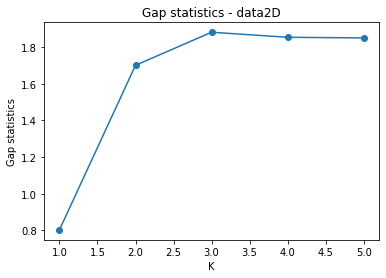

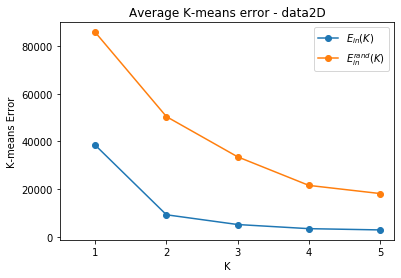

In [144]:
np.random.seed(421)

def GapStat(x,Krange):
    np.random.seed(421)
    size = data.shape
    Maxi = data.max(axis=0)
    Mini = data.min(axis=0)
    Dt = np.matrix(np.diag(Maxi-Mini))
    Ein = []
    Ein.append(None)
    EinRef = []
    EinRef.append(None)
    
    def distPoints(x,m):
        r = np.sum(np.square((x - m)))
        return r
    
    RandomDataset = np.random.random_sample(size=(size[0],size[1],10))
    for i in range(10):
        RandomDataset[:,:,i] = RandomDataset[:,:,i]*Dt+Mini
    
    
    GapStats = np.zeros((len(Krange),))
    for (i,k) in enumerate(Krange):
        print('Running Gap statistics for k =',k)
        (kmc,kml,Losscur,l) = Kmeans(data, k)
        e = sum([distPoints(data[m,:],kmc[kml[m],:]) for m in range(size[0])])
            
        eref = np.zeros((RandomDataset.shape[2],))
        for j in range(RandomDataset.shape[2]):
            (kmc,kml,Losscur,l) = Kmeans(RandomDataset[:,:,j], k)
            eref[j] = sum([distPoints(RandomDataset[m,:,j],kmc[kml[m],:]) for m in range(size[0])])
           
        GapStats[i] = np.mean(np.log(eref))-np.log(e)
        Ein.append(e)
        EinRef.append(np.mean(eref))
          
    return GapStats, Ein, EinRef


# =============================================================================
# data2D
# =============================================================================
Krange =range(1,6)
GapStat2D, Ein2D, EinRef2D = GapStat(data,Krange)
plt.figure()
plt.plot(Krange,GapStat2D,marker='o')
plt.xlabel('K')
plt.ylabel('Gap statistics')
plt.title('Gap statistics - data2D')
plt.figure()
plt.plot(Ein2D,marker='o',label='$E_{in}(K)$')
plt.plot(EinRef2D,marker='o',label ='$E_{in}^{rand}(K)$')
plt.xlim(left=0.5)
plt.xlabel('K')
plt.ylabel('K-means Error')
plt.legend(loc='upper right')
plt.title('Average K-means error - data2D')

Briefly explain the "gap statistic" and discuss on how many clusters you think is "best" based on the gap statisic and on how this compares with your result from above.  

### Answer:
**Gap Statistics** compares the total within intra-cluster variation for different values of k with their expected values under null reference distribution of the data (distribution with no obvious clustering). The estimate of the optimal clusters will be value that maximize the gap statistic (i.e, that yields the largest gap statistic). This means that the clustering structure is far away from the random uniform distribution of points.

Since the optimal number of clusters is the one with largest gap statistic, **K = 3** is the best number of clusters.

The plot from K vs KMeans gave an ambiguous result since there was no conclusive solution. But K=3 was choosen as the elbow, thus the 'best' data size. Wheras the Gap statistics gives a **conclusive result** and this result matches with our previous *Elbow* method. Hence it can be concluded that 3 is the optimum number of clusters for data2D dataset.

## Soft-clustering with the Mixture of Gaussians [7 marks]

Now you will implement and test soft-clustering using density estimation with Gaussian mixture models. For this you will use the functions from the scikit-learn library.

First, write a script that, for the 2D data set data2D.npy,
- estimates the parameters of the Gaussian mixture models with $K=3$ components,
- plots the contours of the density,
- plots the decision boundaries for clustering. 

In the markdown cell below, interpret what you see in the plot and compare with the plot for $K=3$ clusters for the K-Means algorithm above. 

C:\Users\Jarvis\anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Log scale: values of z <= 0 have been masked


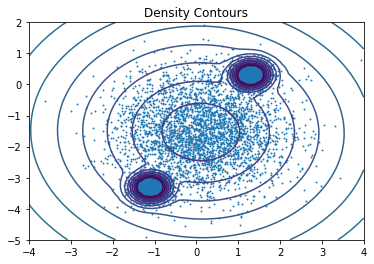

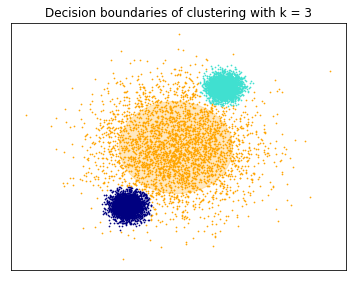

In [117]:
# =============================================================================
# Contours of the density
# =============================================================================
from matplotlib.colors import LogNorm
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

#Using sklearn library to calculate GMM
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(data)
x = np.linspace(-4., 4.)
y = np.linspace(-5.,2.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 2, 20))
plt.scatter(data[:, 0], data[:, 1], .8)

plt.title('Density Contours')
plt.show()

# =============================================================================
# GMM decision boundaries for clustering
# =============================================================================

color_iter = itertools.cycle(['navy', 'turquoise', 'orange'])
Y_ = clf.predict(data)
splot = plt.subplot(1, 1, 1)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(data[Y_ == i, 0], data[Y_ == i, 1], .5, color=color)

    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.25)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Decision boundaries of clustering with k = 3')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

### Answer:
The GMM clustering very different from the K-Means clustering.
- In K-Means,  clustering  of samples is done by minimizing the distance between datapoint and the centroid. This type of hard Assignment might lead to mis grouping and might fail to capture complex geometric shaped data. This works fine when the data is circular. Hence it is called *hard clustering*
- In GMM, instead of hard assgninment of datapoints to a cluster, it uses probability of a sample to determine the feasibility of a datapoint belonging to a cluster. GMM takes variance into consideration for consideration wheras K-means does not. Hence GMM works well even for non-circular distributed points. Hence it is called *soft clustering*

From the cluster plot we could see that k-means tells us what data point belong to which cluster.
On the other hand, provides the probabilities of a given data point belonging to a cluster. (i.e) The clustering gives an idea of how the distribution looks like better than K-means.

Write a script that trains the Gaussian mixture model for the data set data2D.npy for $K=1,2,3,4,5$, and computes and plots the Bayesian Information Criterion (BIC) as a function of $K$.

In the markdown cell below, explain the BIC and what model size it suggests, and compare with your result for the K-Means algorithm above. 

<Figure size 432x288 with 0 Axes>

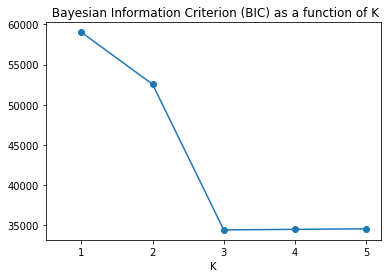

<Figure size 432x288 with 0 Axes>

In [161]:
def BIC(d,kranges):
    lowest_bic = np.infty
    bic = []
    for p in range(min(kranges)):
        bic.append(None) #Dummy value to help plotting from 1
    n_components_range = kranges
    
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type='full')
        gmm.fit(d)
        bic.append(gmm.bic(d))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
                
    bic = np.array(bic)
    return bic

krange = range(1, 6)
bic2D = BIC(data,krange)
plt.figure()
plt.plot(bic2D,marker='o')  
plt.xlim(left=0.5)
#plt.ylim([min(bic),max(bic)])
plt.xlabel('K')
plt.title(' Bayesian Information Criterion (BIC) as a function of K')
plt.figure()

### Answer

From the plot of Bayesian Information Criterion (BIC) vs 𝐾, we can find that the value is lowest when **K = 3**, hence this this the best model size/ best number of clusters.
- The optimum number of clusters suggested by the BIC is **K = 3** which is similar to the K-means algorithm.

The plot from K vs KMeans gave an ambiguous and inconclusive solution. But K=3 was choosen as the elbow, thus the 'best' data size. Wheras the BIC gives a **conclusive and quantitative result** and this matches with our previous *Elbow* method. Hence it can be concluded that 3 is the optimum number of clusters for data2D dataset.

Implement a script that runs both the K-Means and the Gaussian mixture learning algorithms on data100D.npy for $K = \{3,4,5,6,7,8\}$ and plots the K-Means loss and the BIC as a function of $K$, respectively. 
Include the plots in the markdown cell below, and discuss how many clusters you think are within the dataset and compare the learnt results of K-means and Mixture of Gaussian approach.

Remark: The Gaussian mixture learning may take some time to complete (10-30 mins).


Number of Clusters (k): 3 

---------------------------------------------- 

Number of Clusters (k): 4 

---------------------------------------------- 

Number of Clusters (k): 5 

---------------------------------------------- 

Number of Clusters (k): 6 

---------------------------------------------- 

Number of Clusters (k): 7 

---------------------------------------------- 

Number of Clusters (k): 8 

---------------------------------------------- 


Computing BIC for data100D....


<Figure size 432x288 with 0 Axes>

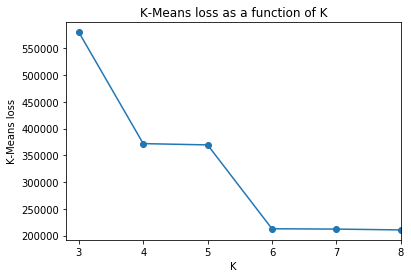

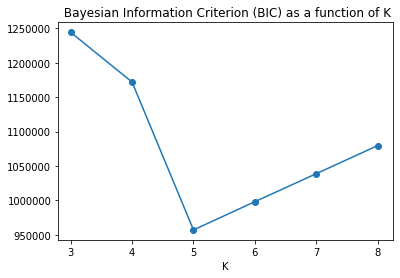

<Figure size 432x288 with 0 Axes>

In [160]:
# =============================================================================
# KMeans clustering for data100D   
# =============================================================================

#Script to run Kmeans for k = 3,4,5,6,7,8
data100 = np.load('C:/Users/Jarvis\Documents/Academic/Fall/Term2/Machine Learning/_Assignment3/data100D.npy')
[num_pts,dim] = np.shape(data100)
lossK = [] #Init a list to hold the loss values
lossK.append(None)

#LOOP
for clusterNo in range(3,9):
    print('Number of Clusters (k):', clusterNo,'\n')
    
    c = KMinit(data100,clusterNo)     #initialise cluster centers
    d = np.stack(c[:])
    mid,clusters,Losscurve,L = Kmeans(data100, clusterNo)  #Run KMeans algorithm    
    lossK.append(L) #hold the values to plot
    print('----------------------------------------------','\n')
plt.figure()    
plt.plot([2,3,4,5,6,7,8],lossK,marker='o')
plt.title('K-Means loss as a function of K')
plt.xlabel('K')
plt.ylabel('K-Means loss')
plt.xlim([2.8,8])

# =============================================================================
# GMM clustering for data100D   
# =============================================================================
print('===================================================','\n')
print('Computing BIC for data100D....')
krange1 = range(3, 9)
bic100D = BIC(data100,krange1)
plt.figure()
plt.plot(bic100D,marker='o')  
plt.xlim(left=2.8)
#plt.ylim([min(bic),max(bic)])
plt.xlabel('K')
plt.title(' Bayesian Information Criterion (BIC) as a function of K')
plt.figure()

### Answer

- The plot of K-means loss vs K with K means algorithm shows that the best cluster size is achieved at **K = 6**, since after K=6 there is little to no changes in the k-means loss.
- On the other hand, the BIC from the GMM clustering shows that the least loss is obtained at **K = 5**. Loss increases if k is increased beyond 5. Hence k = 5 is the best model size.

So with above two results we can conclude the best number of clusters for data100 dataset is K = 5